# **Import Necessary Libraries**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#**Load the Dataset** 

In [30]:
df=pd.read_csv('bmw_pricing_challenge.csv')
df.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   maker_key          4843 non-null   object
 1   model_key          4843 non-null   object
 2   mileage            4843 non-null   int64 
 3   engine_power       4843 non-null   int64 
 4   registration_date  4843 non-null   object
 5   fuel               4843 non-null   object
 6   paint_color        4843 non-null   object
 7   car_type           4843 non-null   object
 8   feature_1          4843 non-null   bool  
 9   feature_2          4843 non-null   bool  
 10  feature_3          4843 non-null   bool  
 11  feature_4          4843 non-null   bool  
 12  feature_5          4843 non-null   bool  
 13  feature_6          4843 non-null   bool  
 14  feature_7          4843 non-null   bool  
 15  feature_8          4843 non-null   bool  
 16  price              4843 non-null   int64 


In [32]:
df.shape

(4843, 18)

# **Performing Basic EDA**

In [33]:
df.isnull().sum()

maker_key            0
model_key            0
mileage              0
engine_power         0
registration_date    0
fuel                 0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
price                0
sold_at              0
dtype: int64

In [34]:
df.duplicated().sum()

0

In [35]:
bool_f= df.select_dtypes('boolean').columns
for col in bool_f:
  print(col,df[col].unique())

feature_1 [ True False]
feature_2 [ True False]
feature_3 [False  True]
feature_4 [False  True]
feature_5 [ True False]
feature_6 [ True False]
feature_7 [ True False]
feature_8 [False  True]


In [36]:
for col in bool_f:
  df[col]=df[col].apply(lambda x:1 if x==True else x==False)

In [37]:
df[bool_f]

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,1,1,True,True,1,1,1,True
1,1,1,True,True,True,1,1,1
2,True,True,True,True,1,True,1,True
3,1,1,True,True,1,1,1,1
4,1,1,True,True,True,1,1,1
...,...,...,...,...,...,...,...,...
4838,True,1,True,True,True,True,1,True
4839,True,1,True,True,True,True,1,1
4840,True,1,True,True,True,True,1,1
4841,1,1,True,True,True,True,1,1


In [38]:
categorical_f= df.select_dtypes('object').columns

In [39]:
categorical_f=['model_key','fuel','paint_color','car_type']

In [40]:
df[categorical_f]

,model_key,fuel,paint_color,car_type
0,118,diesel,black,convertible
1,M4,petrol,grey,convertible
2,320,diesel,white,convertible
3,420,diesel,red,convertible
4,425,diesel,silver,convertible
...,...,...,...,...
4838,218 Gran Tourer,diesel,black,van
4839,218 Active Tourer,diesel,grey,van
4840,218 Gran Tourer,diesel,grey,van
4841,218 Active Tourer,diesel,brown,van


In [41]:
for col in categorical_f:
  print(col, df[col].unique(), '=>',df[col].nunique())

model_key ['118' 'M4' '320' '420' '425' '335' '325' 'Z4' '120' '220' '650' '135'
 '218' '318' '430' 'M3' '330' '225' 'M235' '316' '435' '640'
 '640 Gran Coupé' '435 Gran Coupé' 'i8' '630' '430 Gran Coupé' '635' '520'
 '525' '530' '535' '320 Gran Turismo' '518' '116' '328' '523' 'X3' 'M550'
 '528' '325 Gran Turismo' '125' '318 Gran Turismo' '420 Gran Coupé' 'i3'
 '114' '520 Gran Turismo' '530 Gran Turismo' 'M135' '418 Gran Coupé'
 '330 Gran Turismo' '335 Gran Turismo' '730' '123' '535 Gran Turismo'
 '740' '750' 'ActiveHybrid 5' '735' 'M5' 'X5' 'X1' 'X4' 'X6' 'X6 M' 'X5 M'
 'X5 M50' '218 Active Tourer' '218 Gran Tourer' '216' '220 Active Tourer'
 '216 Gran Tourer' '216 Active Tourer' '225 Active Tourer'
 '214 Gran Tourer'] => 75
fuel ['diesel' 'petrol' 'hybrid_petrol' 'electro'] => 4
paint_color ['black' 'grey' 'white' 'red' 'silver' 'blue' 'orange' 'beige' 'brown'
 'green'] => 10
car_type ['convertible' 'coupe' 'estate' 'hatchback' 'sedan' 'subcompact' 'suv'
 'van'] => 8


**Encoding Fuel type**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


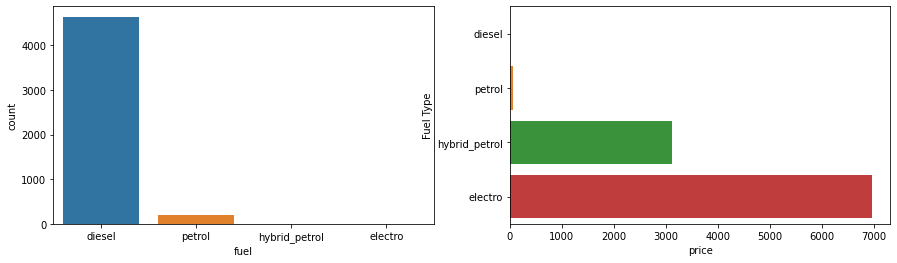

In [42]:
from statistics import median
fuel_pu=[]
for each in df.fuel.unique():
  x=df[df.fuel==each]
  fuel_pu.append(median(x['price']/len(x)))
fig,ax= plt.subplots(1,2, figsize=(15,4))
sns.barplot(fuel_pu,df.fuel.unique(),ax=ax[1])
ax[1].set_xlabel('price')
ax[1].set_ylabel('Fuel Type')
sns.countplot(df.fuel,ax=ax[0])


hybrid fuel type has relatively higher average price compared to other fuel_types,although it has almost low_frequency  in the data.

In [43]:
model_key_pu=[]
for each in df.model_key.unique():
  x= df[df.model_key==each]
  model_key_pu.append(sum(x['price'])/len(x))
len(model_key_pu)

75

In [44]:
len(df.model_key.unique())

75

Text(0, 0.5, 'Model keys')

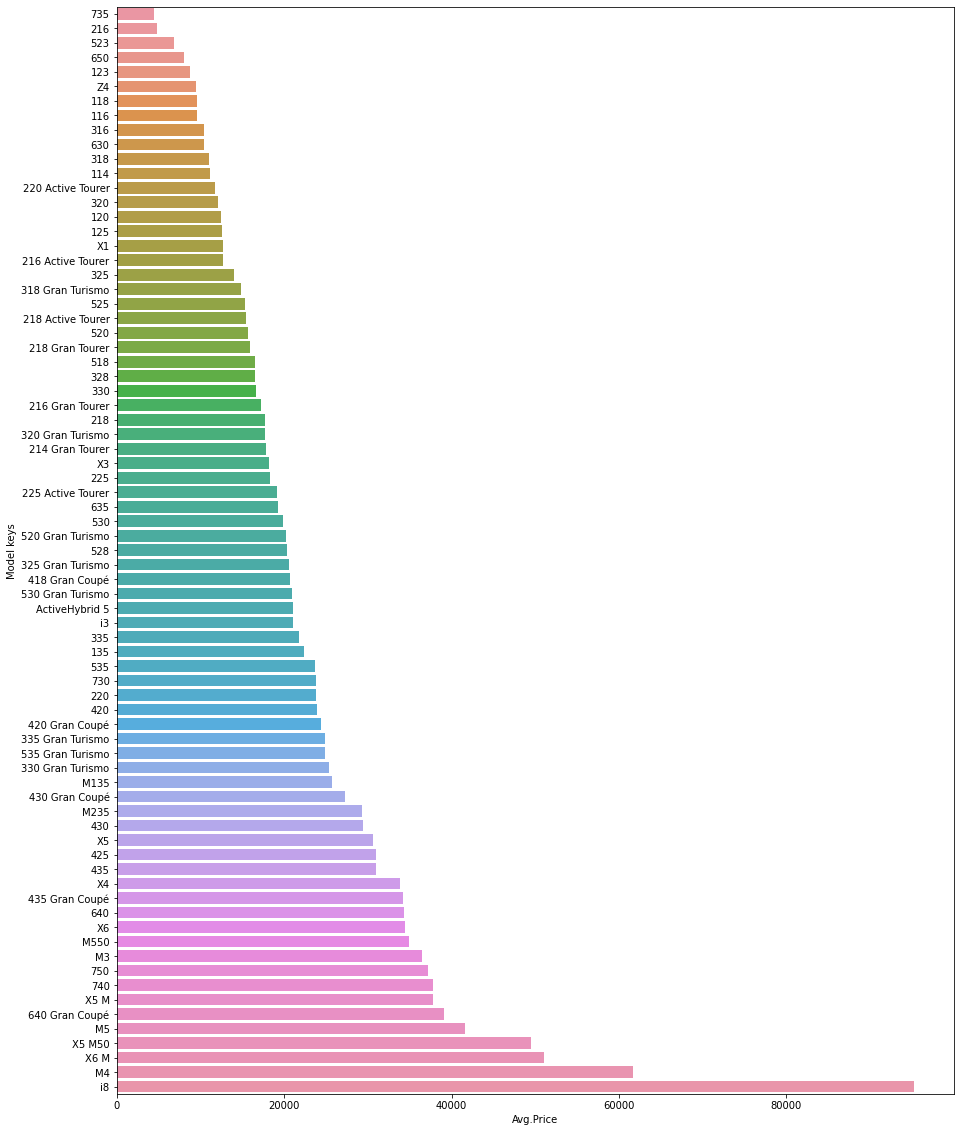

In [45]:
plt.figure(figsize=(15,20))
x= pd.concat([pd.DataFrame(df.model_key.unique(),columns=['Key']), pd.DataFrame(model_key_pu,columns=['value'])],axis=1).sort_values('value')
sns.barplot(x='value',y='Key',data=x)
plt.xlabel('Avg.Price')
plt.ylabel('Model keys')

In [46]:
df['fuel_E']= df.fuel.map({'petrol':1,'diesel':2,'electro':3,'hybrid_petrol':4})
df.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,fuel_E
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,1,1,True,True,1,1,1,True,11300,2018-01-01,2
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,1,1,True,True,True,1,1,1,69700,2018-02-01,1
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,True,True,True,True,1,True,1,True,10200,2018-02-01,2
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,1,1,True,True,1,1,1,1,25100,2018-02-01,2
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,1,1,True,True,True,1,1,1,33400,2018-04-01,2


**Interaction between all the features**

Text(0, 0.5, 'Model Key')

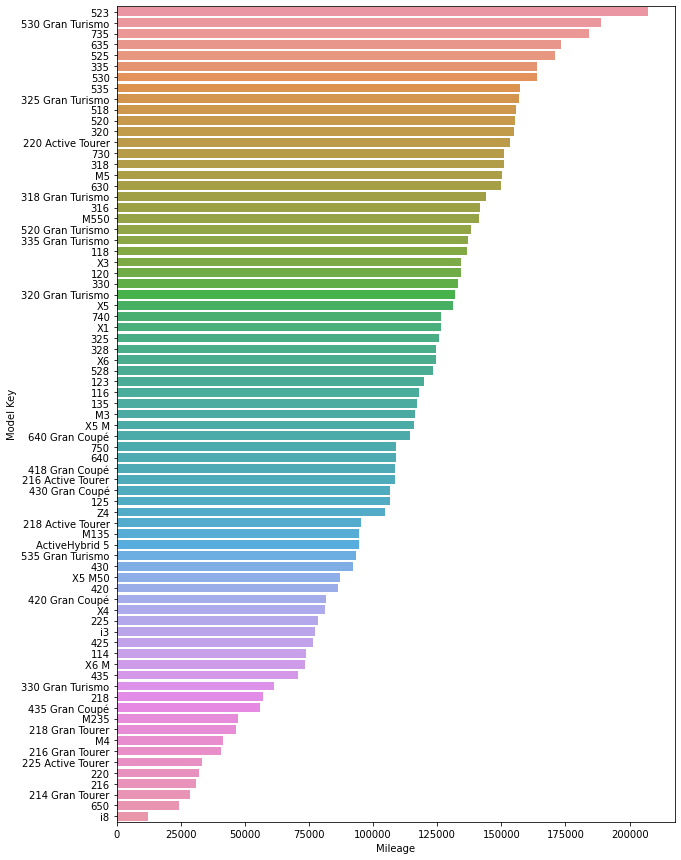

In [48]:
mileage_N=[]
for each in df.model_key.unique():
  x= df[df.model_key==each]
  mileage_N.append(sum(x['mileage'])/len(x))
x=pd.concat([pd.DataFrame(df.model_key.unique(),columns=['key']),pd.DataFrame(mileage_N,columns=['value'])],axis=1).sort_values('value',ascending=False)
plt.figure(figsize=(10,15))
sns.barplot(x='value',y='key',data=x)
plt.xlabel('Mileage')
plt.ylabel('Model Key')

In [49]:
for each in df.fuel.unique():
  print(each,df[df.fuel==each][['price']].describe())

diesel                price
count    4641.000000
mean    15846.110752
std      8969.350978
min       100.000000
25%     10900.000000
50%     14300.000000
75%     18600.000000
max    178500.000000
petrol               price
count    191.000000
mean   14398.429319
std    12374.619511
min      400.000000
25%     6100.000000
50%    11900.000000
75%    18900.000000
max    82400.000000
hybrid_petrol               price
count      8.000000
mean   37575.000000
std    26731.669287
min    15500.000000
25%    20900.000000
50%    25000.000000
75%    47775.000000
max    95200.000000
electro               price
count      3.000000
mean   20966.666667
std      208.166600
min    20800.000000
25%    20850.000000
50%    20900.000000
75%    21050.000000
max    21200.000000
